<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Air_Quality_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Forecasting


###**Objective:**

The objective of this project assignment is to develop a
machine learning model that predicts future air quality levels based
on historical air quality data and relevant environmental factors.

The dataset consists of hourly atmospheric measurements from 12
cities in Beijing, covering the period from **March 1st, 2013**, to
**February 28th, 2017**.

The target variables are PM2.5, PM10, SO2,
NO2, CO, and O3, along with independent variables like temperature,
pressure, dew point temperature, rainfall, wind speed, and wind
direction.

### Data Overview

**No (int64):** Row index or identifier, likely auto-generated.
Not essential for analysis unless it's specifically needed for referencing rows.

**year (int64):** The year the observation was recorded.

**month (int64):** The month the observation was recorded, represented as an integer (1 for January, 2 for February, etc.).

**day (int64):** The day of the month the observation was recorded.

**hour (int64):** The hour of the day the observation was recorded, in 24-hour format (0–23).

**PM2.5 (float64):** The concentration of fine particulate matter (particles smaller than 2.5 micrometers in diameter) in micrograms per cubic meter of air.
Important for assessing air quality and its impact on human health.

**PM10 (float64):** The concentration of particulate matter smaller than 10 micrometers.
Includes larger particles than PM2.5 and also contributes to air quality analysis.

**SO2 (float64):** The concentration of sulfur dioxide in the air, measured in micrograms per cubic meter.
SO2 is a harmful pollutant mainly produced by burning fossil fuels.

**NO2 (float64):** The concentration of nitrogen dioxide in the air, measured in micrograms per cubic meter.
NO2 is a significant pollutant from vehicle emissions and industrial activity.

**CO (float64):** The concentration of carbon monoxide in the air, measured in milligrams per cubic meter.
CO is a colorless, odorless gas resulting from incomplete combustion.

**O3 (float64):** The concentration of ozone in the air, measured in micrograms per cubic meter.
Ozone is a key component of smog and is harmful at ground level.

**TEMP (float64):** Ambient temperature, typically measured in degrees Celsius (°C).
Weather condition parameter influencing air quality.

**PRES (float64):** Atmospheric pressure, typically measured in hectopascals (hPa).
Useful for understanding weather conditions affecting air quality.

**DEWP (float64):** Dew point temperature, measured in degrees Celsius.
Indicates humidity levels, impacting the dispersion of air pollutants.

**RAIN (float64):** Amount of rainfall, measured in millimeters.
Rain can cleanse the air by washing out particulate matter.

**wd (object):** Wind direction, typically categorical (e.g., "N", "NE", "SW").
Determines how pollutants disperse in the atmosphere.

**WSPM (float64):** Wind speed, typically measured in meters per second (m/s).
Influences pollutant dispersion and air quality.

**station (object):** The monitoring station where the data was recorded.
Identifies the location of the measurements.

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff
from scipy.io import arff
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
!pip install liac-arff

In [11]:
import arff

# Open and load the .arff file
with open('/content/air_dataset.arff', 'r') as file:
    dataset = arff.load(file)

# Convert to a Pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Display the first few rows
print(df.head())


   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [13]:
# check missing values
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [15]:
# percentage of missing values %
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


##  Data Preprocessing

### 1. Combine Date-Time Columns

In [16]:
# Combine year, month, day, and hour into datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)  # Ensure the data is sorted by datetime

### 2. Feature Engineering for Time-Series

I created new features based on the datetime column and introducing lag features helps capture temporal patterns and seasonal effects.

- Extract Temporal Features: We can capture patterns by breaking down the datetime into hour, day, month, and year.
- Lagged Features: Lagging the target variable (e.g., PM2.5 at previous time steps) helps incorporate past information to predict future values.
- Rolling Statistics: Rolling averages and standard deviations help smooth out short-term fluctuations and capture trends over time.

In [17]:
# Extract temporal features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# Create lag features for target variables
for lag in range(1, 4):  # 1-hour, 2-hour, and 3-hour lags
    df[f'PM2.5_lag_{lag}'] = df['PM2.5'].shift(lag)

# Create rolling statistics
df['PM2.5_roll_mean_3'] = df['PM2.5'].rolling(window=3).mean()  # 3-hour rolling mean
df['PM2.5_roll_std_3'] = df['PM2.5'].rolling(window=3).std()   # 3-hour rolling std

### 3. Handling Missing Values

### Imputation Strategies for Time-Series Data

#### 1. **Interpolation (Method='time')**

- **How it works**: Interpolation estimates missing values by considering the surrounding data points based on time, ensuring that time intervals are respected during imputation.
- **Why it's ideal for air quality forecasting**: Air quality data (e.g., PM2.5, NO2) follows continuous, smooth trends. Interpolation captures these trends and provides realistic estimates for missing values.
- **Why forward/backward fill is not ideal**: Forward or backward fill methods can introduce "flat-line" effects, distorting continuous data trends by filling missing values with the last or next known value without considering gradual changes over time.

#### 2. **Imputation for Categorical Data (e.g., Wind Direction - `wd`)**

- **How it works**: Forward-fill (`ffill`) is used to fill missing values in categorical variables like wind direction, as these values often remain stable over short periods.
- **Why forward fill works well**: Wind direction typically doesn't change rapidly, and forward-fill ensures that missing values are imputed consistently and reasonably without introducing unnecessary variability.

### **Conclusion**

- **Continuous Data (e.g., air quality metrics)**: I used **Interpolation (Method='time')** to preserve temporal trends.
- **Categorical Data (e.g., wind direction)**: I used **Forward Fill (ffill)** for consistent imputation over short time intervals.



In [18]:
# Define the numerical columns for interpolation
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolate missing numerical values
df[numerical_cols] = df[numerical_cols].interpolate(method='time')

# Forward-fill missing wind direction (categorical data)
df['wd'] = df['wd'].fillna(method='ffill')

<ipython-input-18-19356ac4e778>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')


### 4. Handle Missing Values Introduced by Lagging

Lagging operations create NaN values at the beginning of the dataset. These rows can be dropped, as they don't provide meaningful information for forecasting.

In [19]:
# Drop rows with NaN after lagging/rolling
df.dropna(inplace=True)

### 5. Scaling Features

Normalize or scale numerical variables for model stability, especially if using distance-based models like regression or neural networks.

In [20]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Exploratory Data Analysis (EDA)


Key EDA Steps for Time-Series Data:

- Plot the time-series data to check for trends, seasonality, and anomalies.
- Summary statistics to understand the distribution of the numerical features.
- Autocorrelation and Partial Autocorrelation plots (ACF and PACF) to understand dependencies over time.

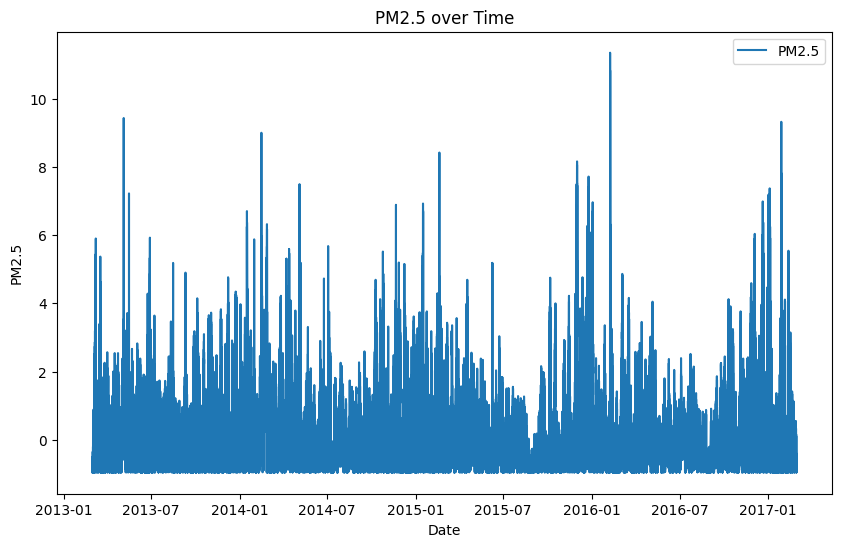

In [22]:
# Plot time series data (PM2.5 over time)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM2.5'], label="PM2.5")
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 over Time')
plt.legend()
plt.show()

### Checking for Stationarity

In [25]:
from statsmodels.tsa.stattools import adfuller

# Use a smaller sample for the ADF test
subset = df['PM2.5'].dropna().iloc[:100000]  # Use the first 100,000 rows or adjust the size
adf_test = adfuller(subset)

In [33]:
# Display ADF test results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: -13.371404277721197
p-value: 5.189122917778003e-25
Critical Values:
	1%: -3.4304154378687812
	5%: -2.8615689225125784
	10%: -2.5667853944414167


The p-value is significantly below 0.05, indicating the **PM2.5** series is stationary. No further differencing is required for time-series modeling.


In [27]:
# Interpretation of results
if adf_test[1] <= 0.05:
    print("The series is stationary (reject H0).")
else:
    print("The series is not stationary (fail to reject H0).")

The series is stationary (reject H0).


In [19]:
# Summary statistics
print(df['PM2.5'].describe())

count    3.910290e+05
mean     2.965524e-17
std      1.000001e+00
min     -9.632644e-01
25%     -7.410783e-01
50%     -3.090499e-01
75%      3.821957e-01
max      1.134337e+01
Name: PM2.5, dtype: float64


### Decomposition

<Figure size 1200x800 with 0 Axes>

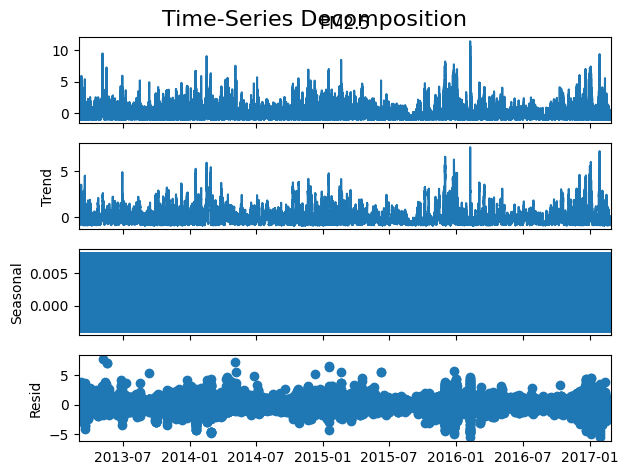

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time-series decomposition
result = seasonal_decompose(df['PM2.5'], model='additive', period=12)  # Adjust `period` to match your data frequency

# Plot decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time-Series Decomposition', fontsize=16)
plt.show()

### ACF and PACF Plot

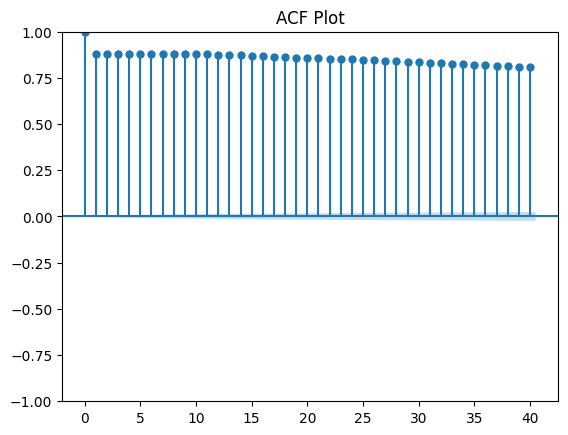

In [36]:
# Creating an acfplot
plot_acf(df['PM2.5'], lags=40)
plt.title("ACF Plot")
plt.show()

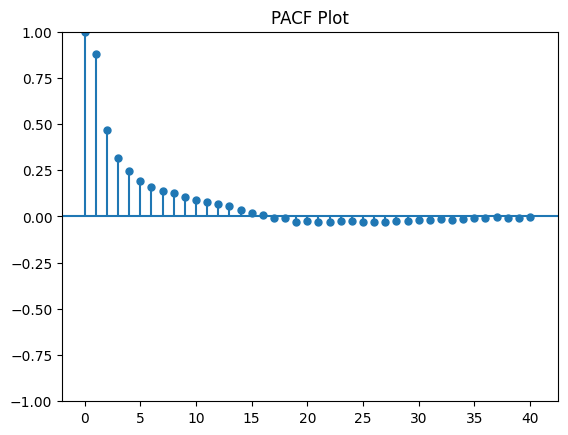

In [37]:
# Creating an acfplot
plot_pacf(df['PM2.5'], lags=40)
plt.title("PACF Plot")
plt.show()

## Model Selection

### Train-Test Split

In [38]:
# Split the data into training and test sets based on the year
train = df[:'2016-12-31']  # Use data up to and including 2016 for training
test = df['2017-01-01':]   # Use data from 2017 onward for testing

In [39]:
# Display the shapes of the splits
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (374660, 23)
Test shape: (16369, 23)


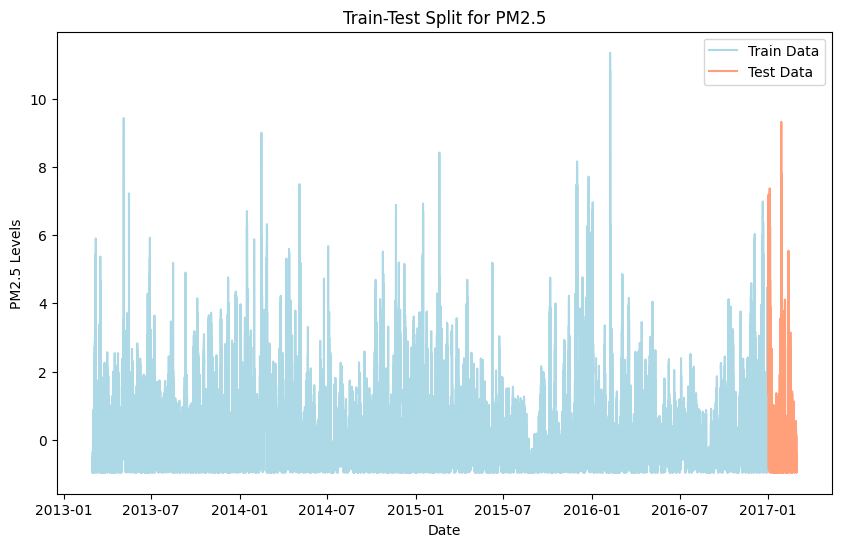

In [41]:
# Plot the train-test split for PM2.5 values with lighter shades
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['PM2.5'], label="Train Data", color='lightblue')
plt.plot(test.index, test['PM2.5'], label="Test Data", color='lightsalmon')
plt.title("Train-Test Split for PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 Levels")
plt.legend()
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

### ARIMA Model


ARIMA (AutoRegressive Integrated Moving Average) is a popular method for time-series forecasting, particularly when there are trends in the data.

- ARIMA has three main parameters: (p, d, q) where:
  - p is the order of the autoregressive term (AR).
  - d is the number of differencing required to make the series stationary.
  - q is the order of the moving average term (MA).

In [46]:
# Use a smaller subset for training (e.g., the first 500 data points)
train_subset = train['PM2.5'].iloc[:500]

# Fit the ARIMA model on the smaller subset
model = ARIMA(train_subset, order=(2, 1, 2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                  500
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 550.648
Date:                Wed, 15 Jan 2025   AIC                          -1091.297
Time:                        09:05:05   BIC                          -1070.234
Sample:                             0   HQIC                         -1083.031
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9119      0.381     -2.392      0.017      -1.659      -0.165
ar.L2         -0.0245      0.051     -0.484      0.628      -0.124       0.075
ma.L1          0.0123      0.376      0.033      0.9

In [47]:
# Forecast the next 100 steps (for example, we predict the next 100 hours)
forecast_steps = 100
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


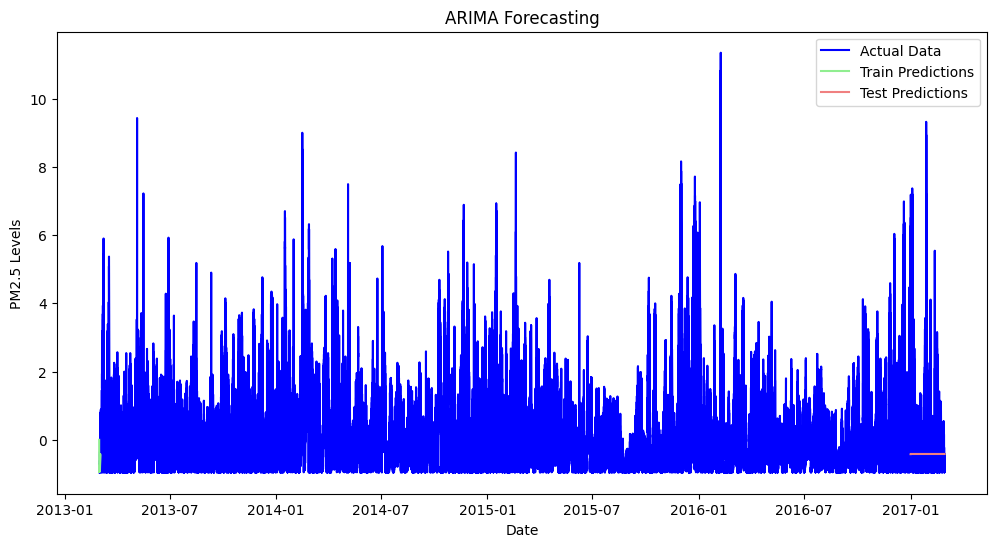

In [50]:
# Get predictions for the train subset and test set
arima_train_predictions = model_fit.fittedvalues[:500]  # Align with the subset size (first 500 points)
arima_test_predictions = model_fit.forecast(steps=len(test))  # Forecast predictions for the test set

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5'], label="Actual Data", color='blue')  # Actual data
plt.plot(train_subset.index, arima_train_predictions, label="Train Predictions", color='lightgreen')  # Train predictions for the subset
plt.plot(test.index, arima_test_predictions, label="Test Predictions", color='lightcoral')  # Test predictions
plt.title("ARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("PM2.5 Levels")
plt.legend()
plt.show()

## Model Evaluation and Visualization